In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump
from pickle import load

In [3]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Data Load

In [79]:
df = pd.read_csv('tous_exemplaires_ready.csv', sep=',', encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54463 entries, 0 to 54462
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date_pub                   54463 non-null  int64 
 1   statut_ex                  54463 non-null  int64 
 2   bib                        54463 non-null  object
 3   pret                       54463 non-null  int64 
 4   diff_datecreation_datepub  54463 non-null  int64 
 5   acces                      54463 non-null  object
 6   acq                        54463 non-null  object
 7   indice                     54463 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.3+ MB


In [80]:
cols_to_change_to_str = ["pret","statut_ex"]
for col in cols_to_change_to_str:
    df[col] = df[col].astype(str)

# Dummies variables for categorical variables

In [81]:
df = pd.get_dummies(df, columns=['bib', 'statut_ex', 'acces', 'acq'], drop_first=True, dummy_na=False)

In [82]:
cols_to_keep = [c for c in df.columns.to_list() if c != 'pret']

# Création du jeu d'entrainement

In [83]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df[cols_to_keep], df[["pret"]], test_size=0.2, random_state=42)

In [20]:
y_train.value_counts()

pret
0       22665
1       20905
dtype: int64

On considère que l'échantillonage réalisé a produit un dataset d'entraînement bien équilibré concernant la partition de la variable cible (pas de sur ou sous-représentation flagrande) -> on n'applique pas de technique d'over ou under sampling

## Variables quantitatives

<AxesSubplot:ylabel='Frequency'>

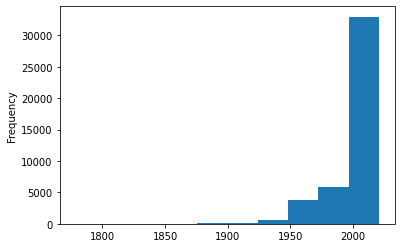

In [13]:
X_train["date_pub"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

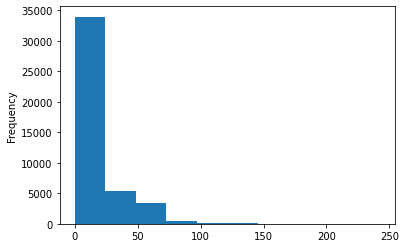

In [14]:
X_train["diff_datecreation_datepub"].plot(kind="hist")

-> Normalisation nécessaire

In [85]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [102]:
std_scaler = dict()
for c in ['date_pub','diff_datecreation_datepub']:
    std_scaler[f'std_scaler_{c}'] = StandardScaler()
    X_train[[f'{c}_std_scaler']] = std_scaler[f'std_scaler_{c}'].fit_transform(X_train[[c]])
    X_train.drop([c], axis = 1, inplace = True)
    X_test[[f'{c}_std_scaler']] = std_scaler[f'std_scaler_{c}'].transform(X_test[[c]])
    X_test.drop([c], axis = 1, inplace = True)

<AxesSubplot:ylabel='Frequency'>

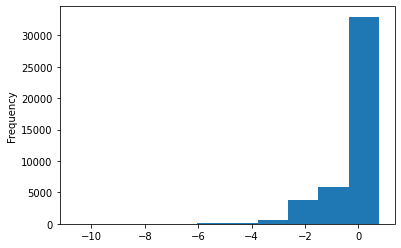

In [87]:
# -> résultat
X_train["date_pub_std_scaler"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

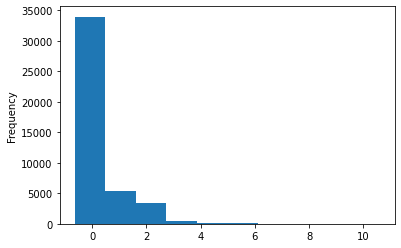

In [88]:
X_train["diff_datecreation_datepub_std_scaler"].plot(kind="hist")

In [89]:
# save the scaler
dump(std_scaler, open('std_scaler.pkl', 'wb'))

# Usage
# std_scaler = load(open('std_scaler.pkl', 'rb'))
## ex :  X_test_scaled = std_scaler.transform(X_test)
# std_scaler['std_scaler_date_pub'].transform([[2015]])

## Variable catégorielle indice

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_ohe = encoder.fit_transform(X_train[['indice']])
dfOneHot = pd.DataFrame(X_ohe, columns = ["indice_"+str(int(i)) for i in range(X_ohe.shape[1])])
X_train = pd.concat([X_train, dfOneHot], axis=1)

In [111]:
X_train

,indice,bib_DROIT,bib_EPU,bib_LASH,bib_MEDP,bib_SCIEN,bib_SJA,bib_STAPS,statut_ex_19,acces_indirect,...,indice_140,indice_141,indice_142,indice_143,indice_144,indice_145,indice_146,indice_147,indice_148,indice_149
27625,32,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45946,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44430,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52381,33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37742,94,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Test de modèles ML

In [93]:
##pour l'évaluation
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
##pour courbe ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Régression logistique

In [94]:
from sklearn.linear_model import LogisticRegression

In [100]:
##instanciation du modèle
logmodel = LogisticRegression(solver='sag',max_iter = 4000)
##entrainement sur les données du set d'entrainement classique
logmodel.fit(X_train,y_train)
##prédictions
predictions = logmodel.predict(X_test)

ValueError: setting an array element with a sequence.

In [36]:
print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5628
           1       0.72      0.78      0.75      5265

    accuracy                           0.75     10893
   macro avg       0.75      0.75      0.75     10893
weighted avg       0.75      0.75      0.75     10893

Accuracy: 0.7485541173230515


## Arbres de décision

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)
#Predict the response for test dataset
pred_treemodel = treemodel.predict(X_test)

In [40]:
print(classification_report(y_test,pred_treemodel))
print("Accuracy:",metrics.accuracy_score(y_test, pred_treemodel))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5628
           1       0.72      0.73      0.73      5265

    accuracy                           0.73     10893
   macro avg       0.73      0.73      0.73     10893
weighted avg       0.73      0.73      0.73     10893

Accuracy: 0.734049389516203


## Forêts aléatoires

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forestmodel = RandomForestClassifier(n_estimators=100)
# Train Decision Tree Classifer
forestmodel.fit(X_train,y_train)
#Predict the response for test dataset
pred_forestmodel = forestmodel.predict(X_test)

In [43]:
print(classification_report(y_test,pred_forestmodel))
print("Accuracy:",metrics.accuracy_score(y_test, pred_forestmodel))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5628
           1       0.71      0.76      0.73      5265

    accuracy                           0.74     10893
   macro avg       0.74      0.74      0.74     10893
weighted avg       0.74      0.74      0.74     10893

Accuracy: 0.735701826861287


In [44]:
feature_importance = pd.Series(forestmodel.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

date_pub_std_scaler                     3.200712e-01
diff_datecreation_datepub_std_scaler    2.652349e-01
indice_numinv                           5.772691e-02
acces_indirect                          5.010887e-02
acq_don                                 2.699117e-02
                                            ...     
indice_ND                               9.348788e-06
indice_05                               8.324402e-06
indice_AS                               3.249494e-06
indice_M2                               3.996062e-07
indice_P                                0.000000e+00
Length: 162, dtype: float64